# EX 1


In [2]:
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn import datasets 
from sklearn.model_selection import train_test_split 
from sklearn.naive_bayes import GaussianNB

In [3]:
 # Downloading the iris dataset 
iris = datasets.load_iris() 
class_names = iris.target_names 
# Convert to pandas format for easier processing 
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names) 
iris_df['target'] = iris.target

In [4]:
 iris_df.head() 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
 # Splitting dataset into train set and test set 
X_train, X_test, y_train, y_test = train_test_split( 
iris_df[['sepal length (cm)', 'sepal width (cm)',  
'petal length (cm)','petal width (cm)']], 
iris_df['target'], 
test_size=0.2,  
random_state=2021)

In [6]:
 # Import Naive Bayes 
# In this case, I assume features follow a normal distribution 
NB = GaussianNB() 
# Train Naive Bayes Model 
NB.fit(X_train, y_train) 
print("Training accuracy: {:.2f}".format(NB.score(X_train, y_train))) 
# Evaluate Model on test set 
y_predict = NB.predict(X_test) 
print("Testing accuracy NB: {:.2f}".format(NB.score(X_test, y_test))) 

Training accuracy: 0.97
Testing accuracy NB: 0.93


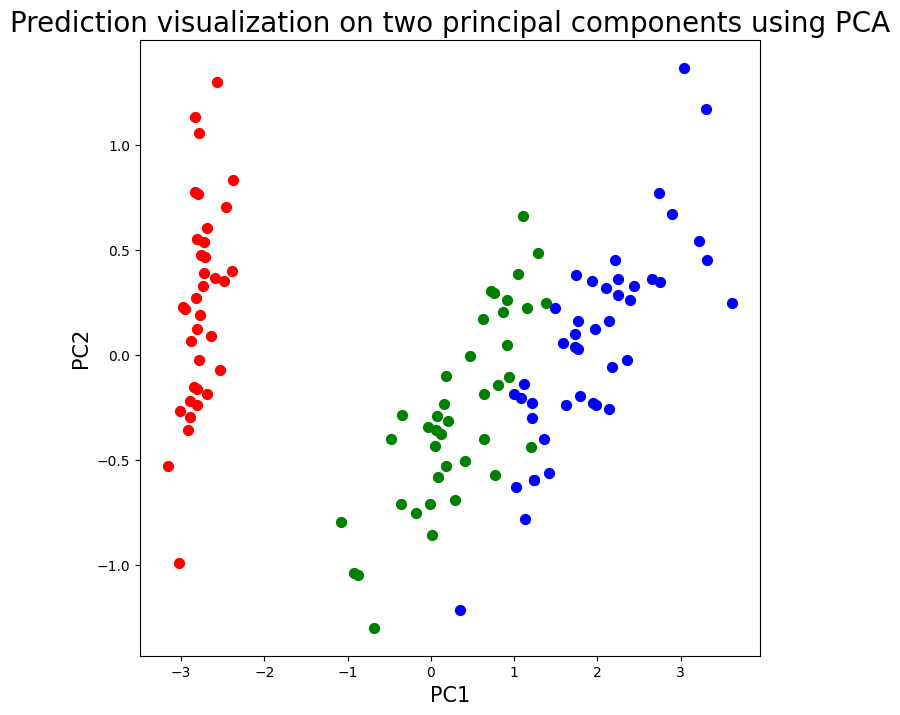

In [8]:
# Visualization 
from sklearn.decomposition import PCA 
pca = PCA(n_components=2) 
principalComponents = pca.fit_transform(X_train) 
principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2']) 
finalDf = pd.concat([principalDf, y_train.reset_index(drop=True)], axis=1) 
fig = plt.figure(figsize=(8, 8)) 
ax = fig.add_subplot(1, 1, 1) 
ax.set_xlabel('PC1', fontsize=15) 
ax.set_ylabel('PC2', fontsize=15) 
ax.set_title('Prediction visualization on two principal components using PCA', 
fontsize=20) 
targets = [0, 1, 2] 
targets_2_desc = {0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'} 
colors = ['r', 'g', 'b'] 
for target, color in zip(targets, colors): 
    indicesToKeep = finalDf['target'] == target 
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1'], 
                finalDf.loc[indicesToKeep, 'PC2'], 
c=color, 
s=50,  
label=targets_2_desc[target])

# EX 2


In [10]:
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import datasets, metrics 
from sklearn.model_selection import train_test_split 
import numpy as np

In [11]:
digits = datasets.load_digits() 
n_samples = len(digits.images) 
print('The number of samples:', n_samples) 

The number of samples: 1797


In [12]:
print('Shape of digit samples:', digits.images.shape)

Shape of digit samples: (1797, 8, 8)


In [13]:
def display_digits(X, Y): 
    fig, ax = plt.subplots(nrows=5, ncols=5, figsize=(10, 10)) 
    fig.suptitle( "Display randomly images of the training data set") 
    for i in range(5): 
        for j in range(5): 
            ind = np.random.randint(X.shape[0]) 
            tmp = X[ind, :]# .reshape(8, 8) 
            ax[i,j].set_title("Label: {}".format(Y[ind])) 
            ax[i,j].imshow(tmp, cmap='gray_r') 
            plt.setp(ax[i,j].get_xticklabels(), visible=False) 
            plt.setp(ax[i,j].get_yticklabels(), visible=False) 
    fig.subplots_adjust(hspace=0.5, wspace=0.5)

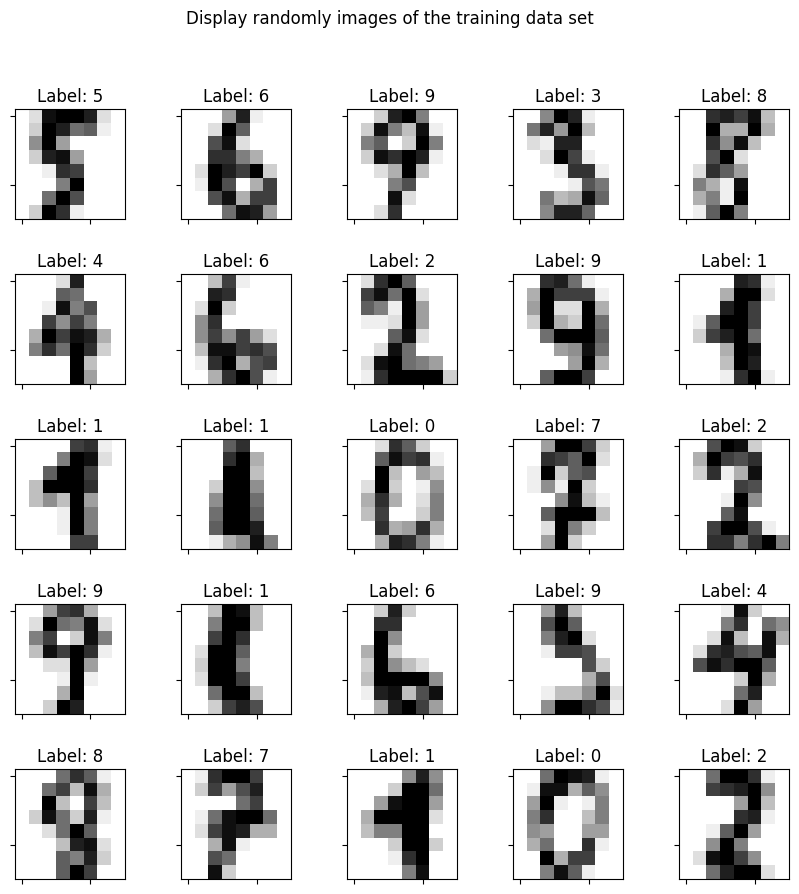

In [14]:
 # Split data into 50% train and 50% test subsets 
X_train, X_test, y_train, y_test = train_test_split(digits.images,  
                                                    digits.target,  
                                                    test_size=0.2,  
                                                    random_state=200, 
                                                    shuffle=False) 
display_digits(X_train, y_train)

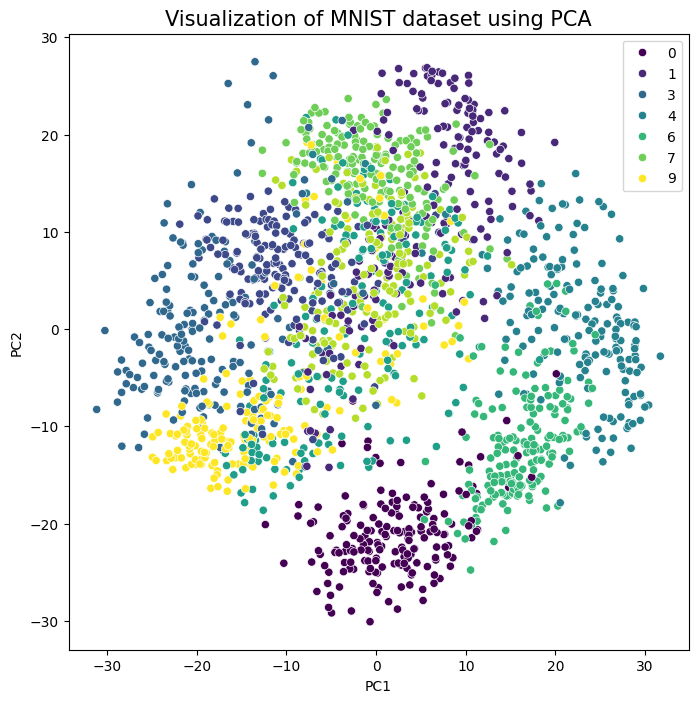

In [15]:
from sklearn.decomposition import PCA 
# Create a Randomized PCA model that takes two components 
pca = PCA(n_components=2) 
# Fit and transform the data to the model 
reduced_data_rpca = pca.fit_transform(digits.data) 
# Create a regular PCA model  
pca = PCA(n_components=2) 
# Fit and transform the data to the model 
reduced_data_pca = pca.fit_transform(digits.data) 
plt.figure(figsize=(8, 8)) 
_ = sns.scatterplot(x=reduced_data_pca[:, 0],  
                    y=reduced_data_pca[:, 1],  
                    hue=digits.target,  
                    palette='viridis') 
_ = plt.xlabel('PC1') 
_ = plt.ylabel('PC2') 
_ = plt.title('Visualization of MNIST dataset using PCA', {'fontsize'
 : 15})

In [16]:
 # Flatten the images 
X_train = X_train.reshape((len(X_train), -1)) 
X_test = X_test.reshape((len(X_test), -1))

In [17]:
# =========================== 
# Create a classifier here 
# Example: This example, we use Logistic Regressor 
from sklearn.linear_model import LogisticRegression 
clf = LogisticRegression(penalty='l2',  
fit_intercept=True, 
random_state=2021, 
solver='lbfgs', 
max_iter=100, 
verbose=1, 
n_jobs=5,) 

In [18]:
# Learn the digits on the train subset 
clf.fit(X_train, y_train) 
# Predict the value of the digit on the test subset 
predicted = clf.predict(X_test)

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
/usr/local/python/3.12.1/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


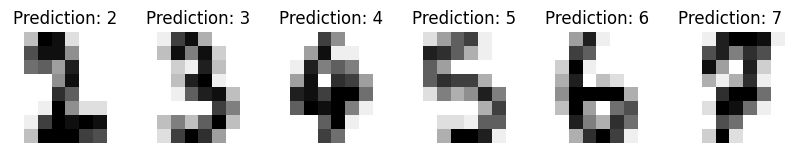

In [20]:
# Show predictions 
_, axes = plt.subplots(nrows=1, ncols=6, figsize=(10, 3)) 
for ax, image, prediction in zip(axes, X_test, predicted): 
    ax.set_axis_off() 
    image = image.reshape(8, 8) 
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest') 
    ax.set_title(f'Prediction: {prediction}')

In [21]:
 print(f"Classification report for classifier {clf}:\n" 
     f"{metrics.classification_report(y_test, predicted)}\n") 

Classification report for classifier LogisticRegression(n_jobs=5, random_state=2021, verbose=1):
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        35
           1       0.79      0.83      0.81        36
           2       1.00      1.00      1.00        35
           3       0.93      0.76      0.84        37
           4       0.97      0.92      0.94        37
           5       0.90      0.95      0.92        37
           6       0.97      0.97      0.97        37
           7       0.97      0.94      0.96        36
           8       0.78      0.88      0.83        33
           9       0.80      0.89      0.85        37

    accuracy                           0.91       360
   macro avg       0.91      0.91      0.91       360
weighted avg       0.91      0.91      0.91       360




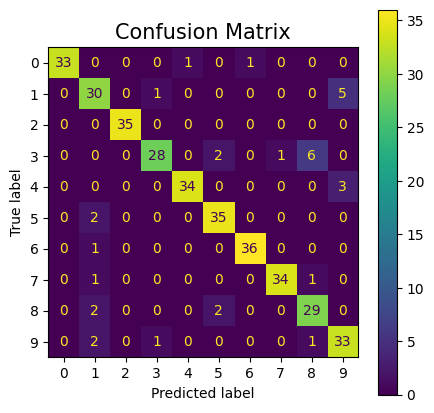

In [24]:
plt.figure(figsize=(5, 5)) 
ax = plt.gca() 
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Tính ma trận nhầm lẫn
cm = confusion_matrix(y_test, clf.predict(X_test))

# Hiển thị
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=ax)
plt.title("Confusion Matrix", fontsize=15)
plt.show()


# EX 3


In [26]:
import pandas as pd 
import numpy as np 
import random as rnd 
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn import metrics 
from sklearn.model_selection import train_test_split 
from sklearn import tree 
from sklearn import datasets 

In [27]:
# Load dataset 
dataset = datasets.load_wine() 
X = dataset.data; y = dataset.target 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25) 

In [28]:
data_df = pd.DataFrame(X, columns=dataset.feature_names) 
data_df 

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [30]:
model = DecisionTreeClassifier(max_depth=4, ) 
model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [31]:
y_pred = model.predict(X_test) 
print(f"Classification report for DecisionTree:\n" 
     f"{metrics.classification_report(y_test, y_pred)}\n")

Classification report for DecisionTree:
              precision    recall  f1-score   support

           0       1.00      0.83      0.91        18
           1       0.85      1.00      0.92        17
           2       1.00      1.00      1.00        10

    accuracy                           0.93        45
   macro avg       0.95      0.94      0.94        45
weighted avg       0.94      0.93      0.93        45




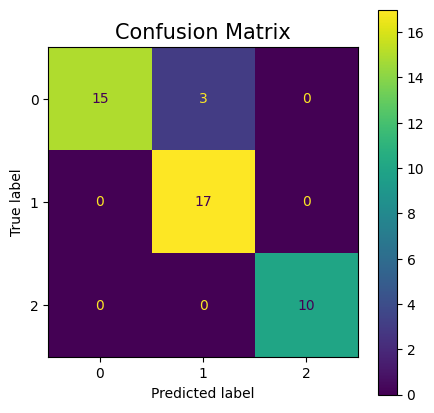

In [ ]:
# Plot the confusion matrix 
plt.figure(figsize=(5, 5)) 
ax = plt.gca() 
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, model.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=ax)
plt.title("Confusion Matrix", fontsize=15)
plt.show()


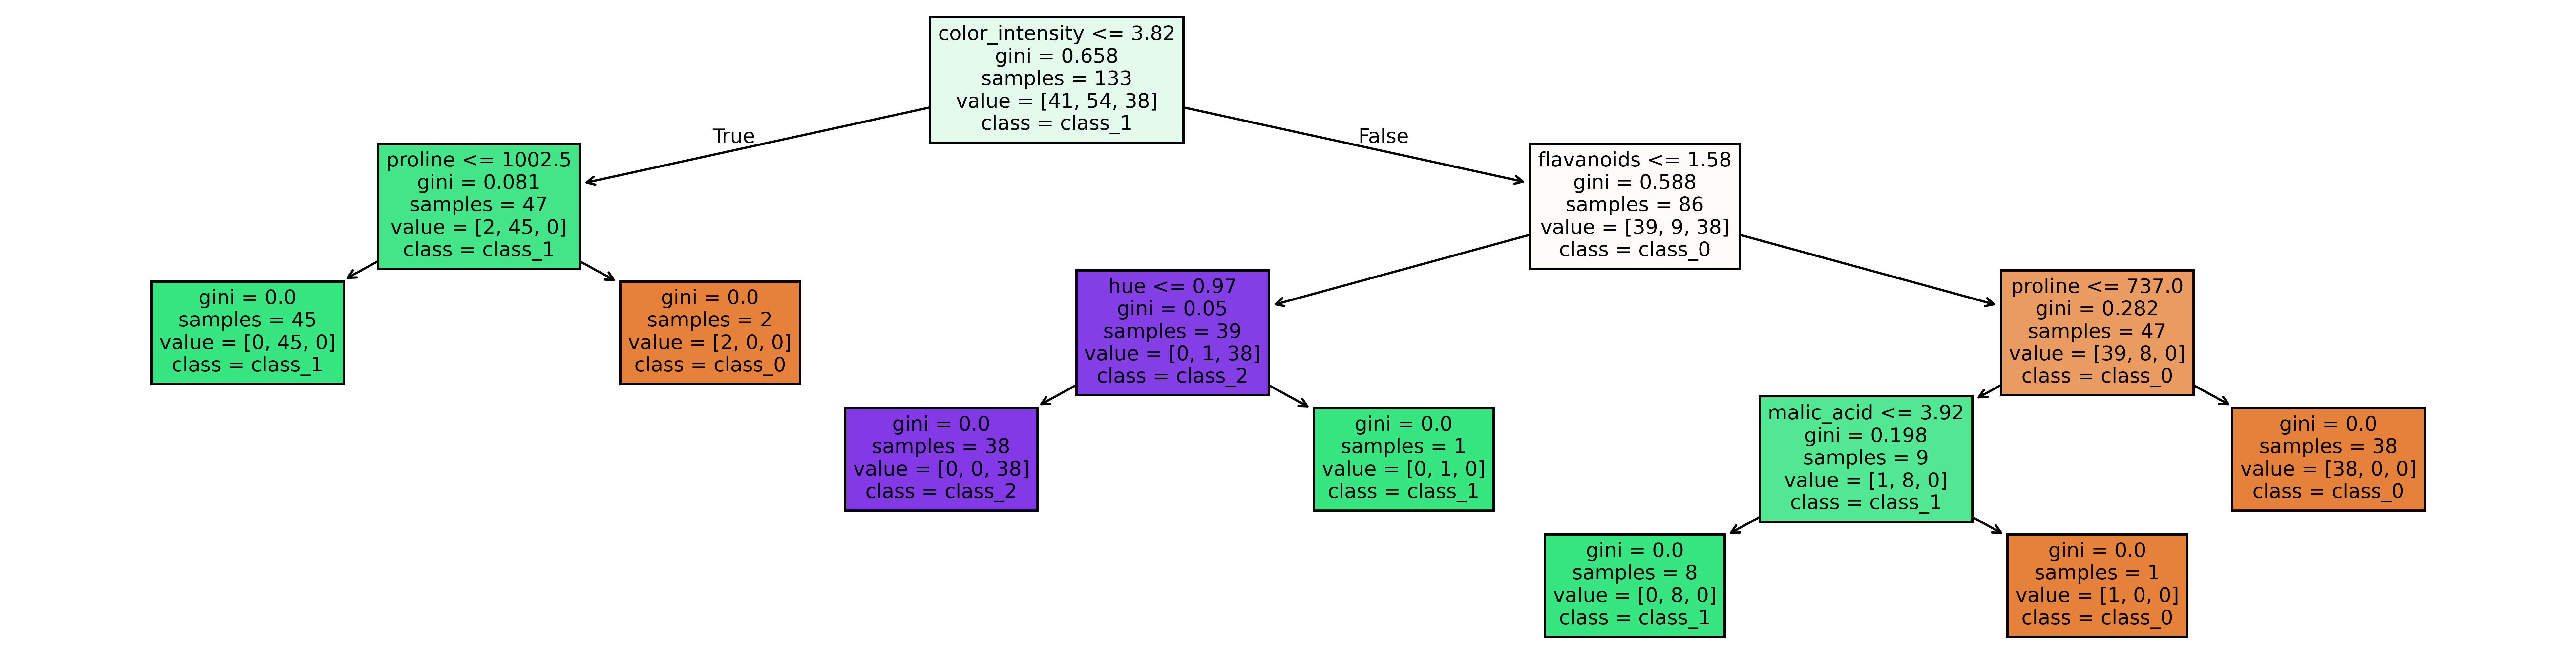

In [36]:
# Show Decision Tree Decision 
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (20, 5), dpi=500) 
tree.plot_tree(model, 
              feature_names =dataset.feature_names,  
              class_names=dataset.target_names, 
              filled = True);

/tmp/ipykernel_7100/361329738.py:26: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=dataset.target_names[i],
/tmp/ipykernel_7100/361329738.py:26: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=dataset.target_names[i],
/tmp/ipykernel_7100/361329738.py:26: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=dataset.target_names[i],
/tmp/ipykernel_7100/361329738.py:26: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=dataset.target_names[i],
/tmp/ipykernel_7100/361329738.py:26: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=dataset.ta

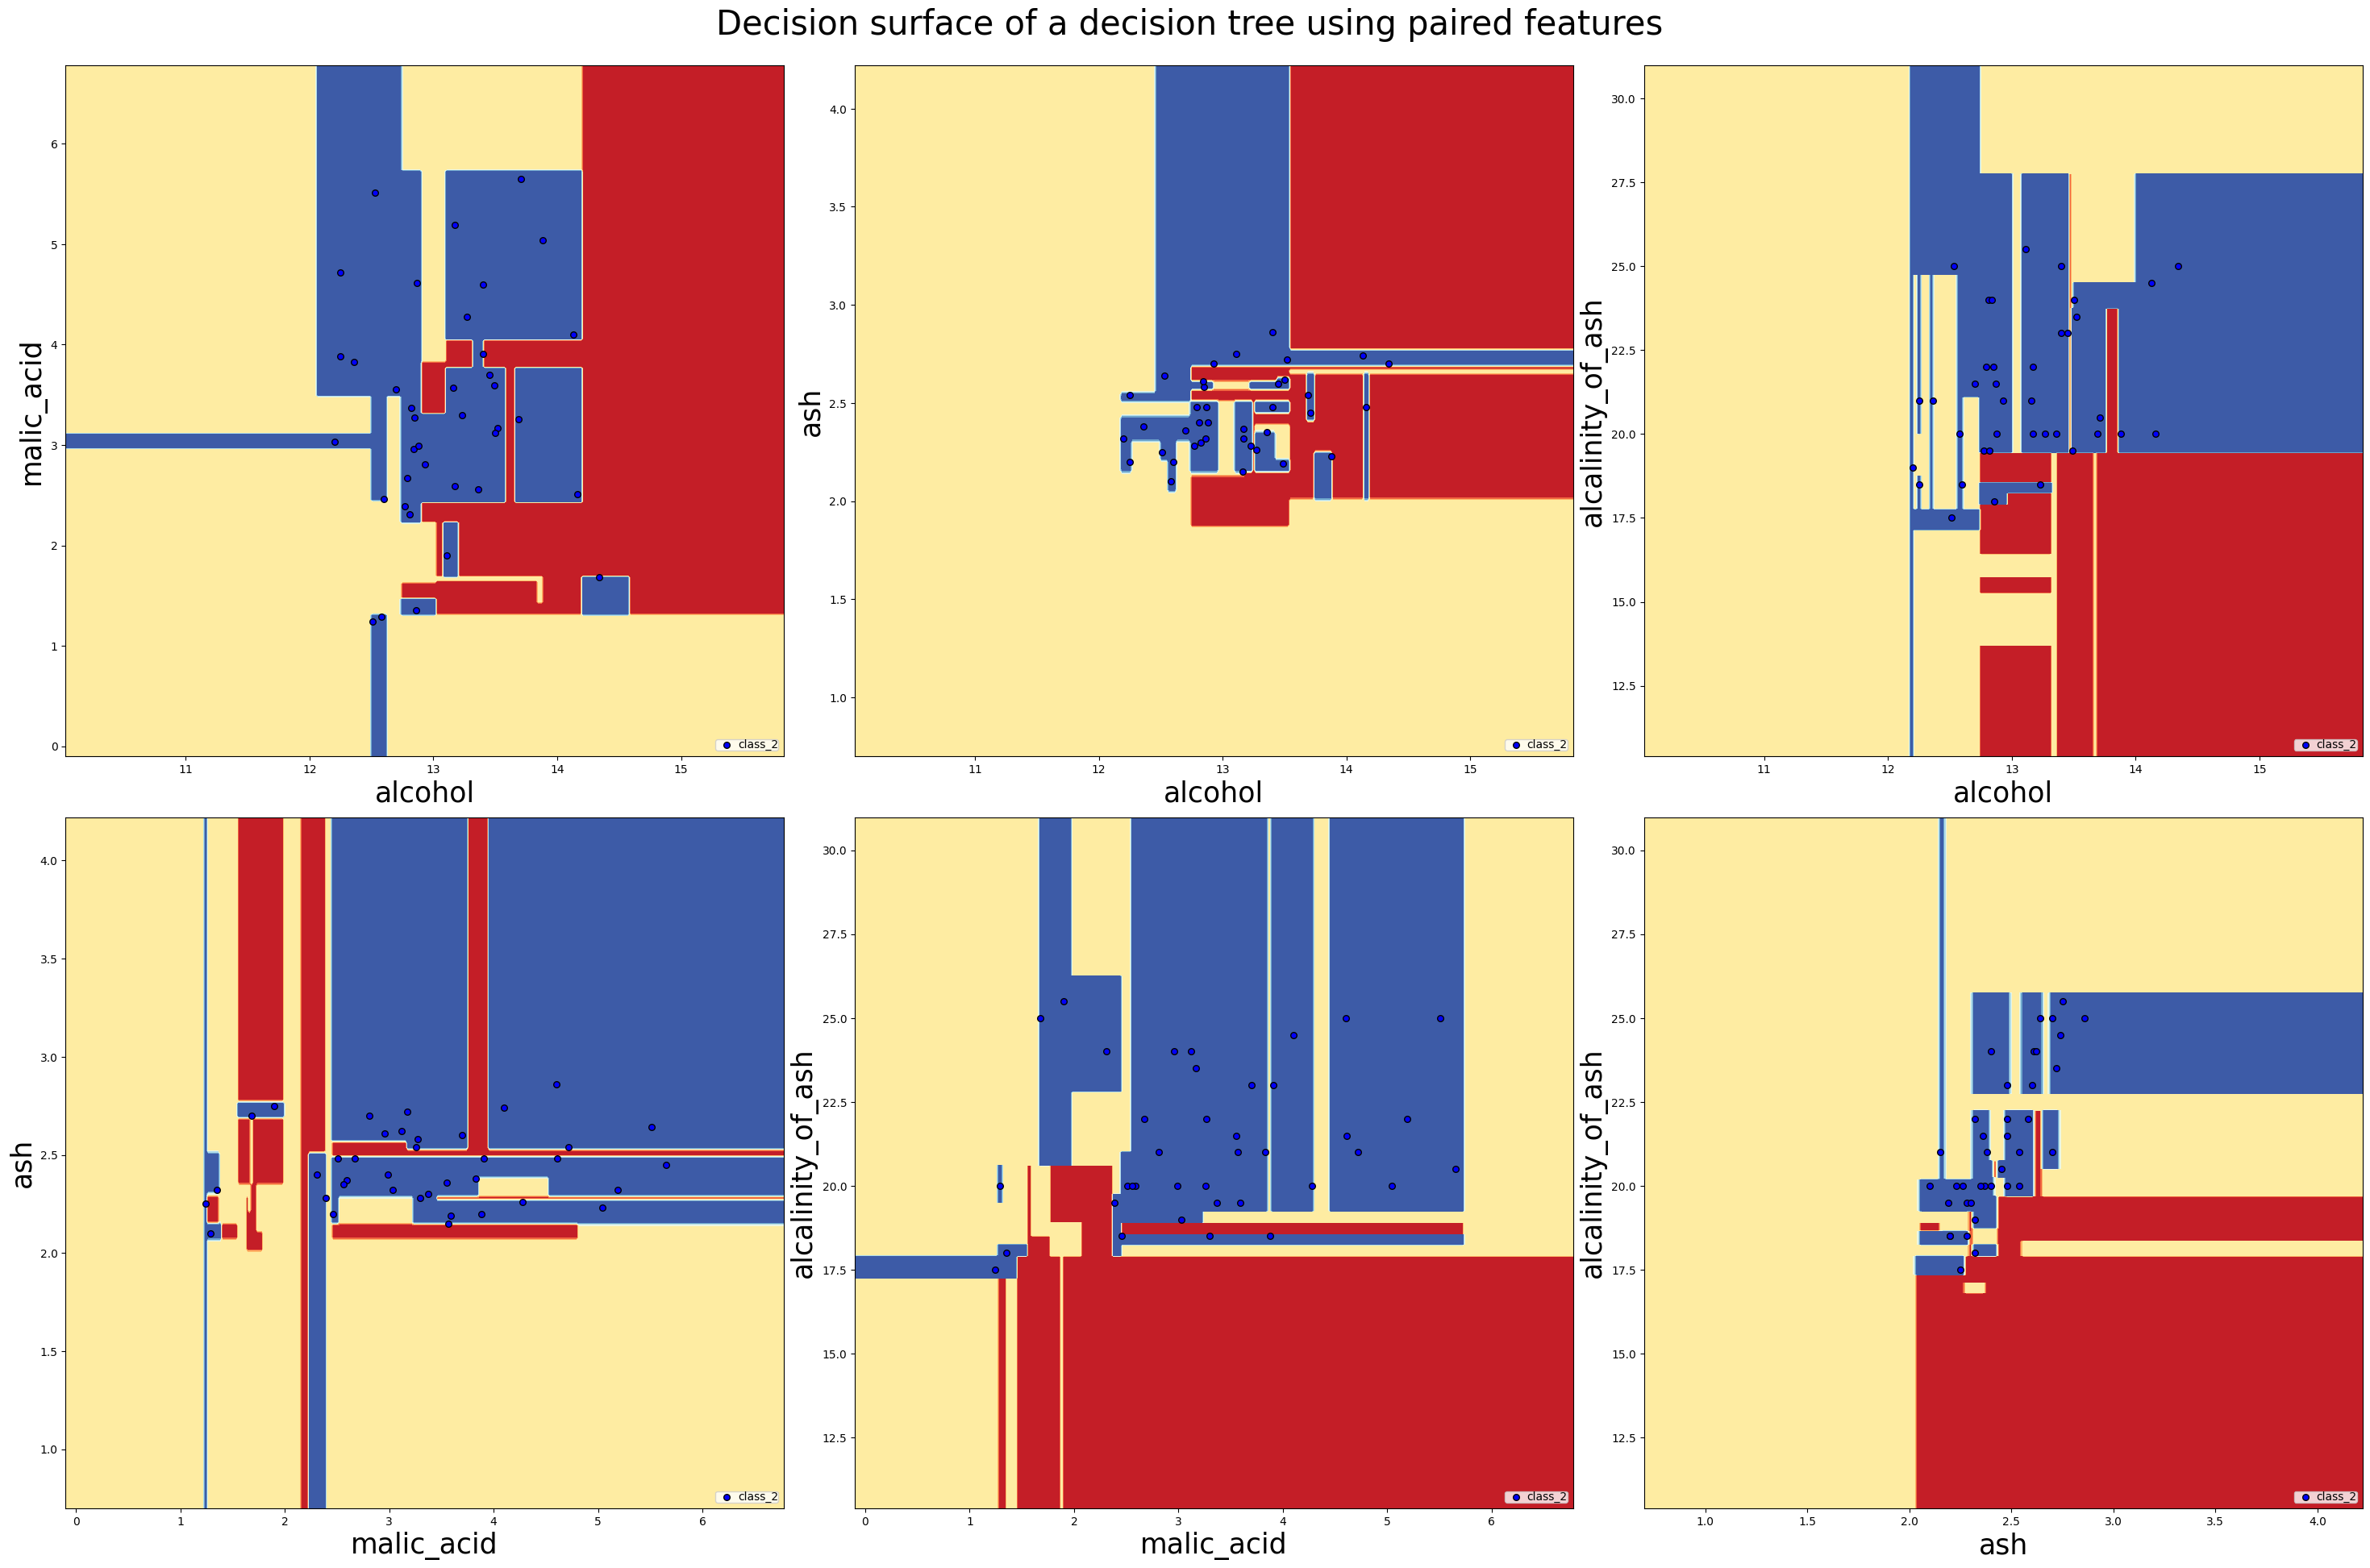

In [39]:
 # Plot the decision boundary 
n_classes = 3 
plot_colors = "ryb" 
plot_step = 0.02 
font = {'size'   : 25} 
plt.figure(figsize=(30, 20)) 
plt.suptitle("Decision surface of a decision tree using paired features", **{'size': 30}) 
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], 
                                [1, 2], [1, 3], [2, 3]]): 
    plt.subplot(2, 3, pairidx + 1) 
    X = X_train[:, pair] 
    clf = DecisionTreeClassifier().fit(X, y_train) 
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1 
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1 
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), 
    np.arange(y_min, y_max, plot_step)) 
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5) 
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) 
    Z = Z.reshape(xx.shape) 
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu) 
    plt.xlabel(dataset.feature_names[pair[0]], **font) 
    plt.ylabel(dataset.feature_names[pair[1]], **font) 
    # Show the training points 
    for i, color in zip(range(n_classes), plot_colors): 
        idx = np.where(y_train == i) 
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=dataset.target_names[i], 
    cmap=plt.cm.RdYlBu, edgecolor='black', s=30)     
    plt.legend(loc='lower right', borderpad=0, handletextpad=0)